In [1]:
library(survival)
library(ggplot2)

In [3]:
data <- read.csv("data//simulated HF mort data for GMPH (1K) final.csv", header = TRUE, sep = ",")

In [4]:
gender <- as.factor(data$gender) # person gender
fu_time <- data$fu_time # follow-up time
death <- data$death # 1 if person is dead, 0 otherwise

In [9]:
km_fit <- survfit(Surv(fu_time, death) ~ 1)

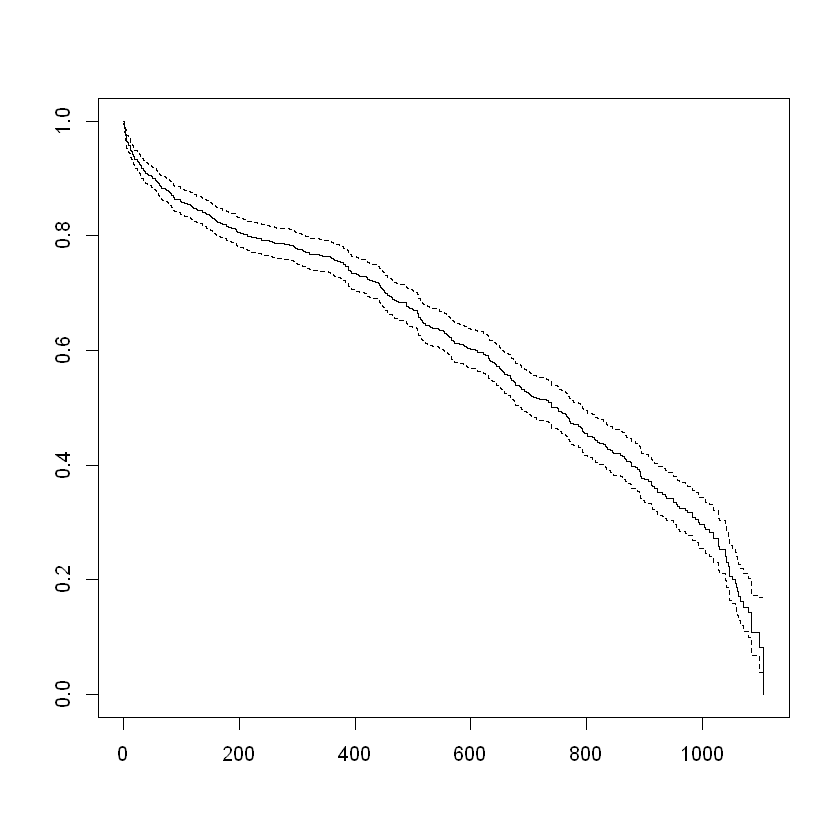

In [10]:
plot(km_fit)

In [11]:
summary(km_fit, times = c(1:7,30,60,90*(1:10)))

Call: survfit(formula = Surv(fu_time, death) ~ 1)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1    992      12    0.988 0.00346        0.981        0.995
    2    973       7    0.981 0.00435        0.972        0.989
    3    963       5    0.976 0.00489        0.966        0.985
    4    954       6    0.970 0.00546        0.959        0.980
    5    945       5    0.964 0.00590        0.953        0.976
    6    938       1    0.963 0.00598        0.952        0.975
    7    933       1    0.962 0.00606        0.951        0.974
   30    865      39    0.921 0.00865        0.905        0.939
   60    809      28    0.891 0.01010        0.871        0.911
   90    770      24    0.864 0.01117        0.843        0.887
  180    698      43    0.815 0.01282        0.790        0.841
  270    653      24    0.787 0.01363        0.760        0.814
  360    619      21    0.761 0.01428        0.733        0.789
  450    525      44    0.705 0.01554        0.675   

 Factor w/ 2 levels "1","2": 2 1 2 1 2 1 1 2 2 2 ...


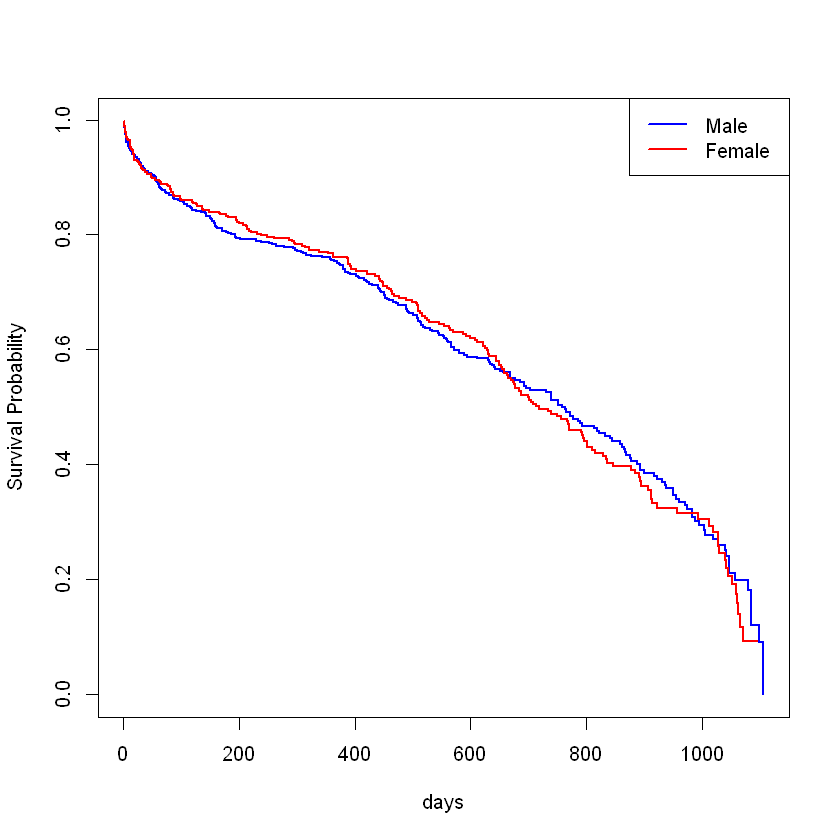

In [30]:
km_gender_fit <- survfit(Surv(fu_time, death) ~ gender)
plot(km_gender_fit, col = c('blue', 'red'),
    lwd = 2,
    xlab = "days",
    ylab = "Survival Probability")
legend('topright', legend = c('Male', 'Female'), col = c('blue', 'red'), lwd = 2)

In [24]:
# gender 1 = Male
# gender 2 = Female
survdiff(Surv(fu_time, death) ~ gender, rho=0) 

Call:
survdiff(formula = Surv(fu_time, death) ~ gender, rho = 0)

           N Observed Expected (O-E)^2/E (O-E)^2/V
gender=1 548      268      271    0.0365     0.082
gender=2 452      224      221    0.0448     0.082

 Chisq= 0.1  on 1 degrees of freedom, p= 0.8 

**Results of the interpretation of log-rank test for gender**

The log-rank test compares the survival time by gender. It’s the most popular method of comparing the survival of patient groups that takes the whole follow-up period into account. Its big advantage is that it you don’t need to know anything about the shape of the survival curve or the distribution of survival times. It’s based on a comparison of the observed numbers of deaths and the numbers of deaths expected if in fact there were no difference in the probability of death between the groups (genders in this case) and uses a chi-squared test.

The resulting p-value that you should have got is high, at 0.8. There’s therefore no good evidence of a difference between the genders in their survival times.

- Fail to reject the null hypothesis

- Both genders seem to have similar survival rates over time

- The group (gender) difference is not statistically significant